In [4]:
!pip install numpy matplotlib --quiet


[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Data for K-Fold results
data = {
    2: {
        'steps': [400, 800, 1200, 1600],
        'folds': [
            {'train_loss': [6.042600, 0.503600, 0.213700, 0.126700],
             'val_loss':   [0.840106, 0.343223, 0.347397, 0.341665],
             'wer':        [0.832086, 0.432801, 0.388113, 0.365211],
             'cer':        [0.211348, 0.082431, 0.072289, 0.066611]},
            {'train_loss': [0.295400, 0.197300, 0.127300, 0.090400],
             'val_loss':   [0.054327, 0.063224, 0.062568, 0.055714],
             'wer':        [0.108613, 0.119631, 0.106610, 0.091142],
             'cer':        [0.015134, 0.018078, 0.016464, 0.014041]}
        ]
    },
    3: {
        'steps': [400, 800, 1200, 1600, 2000],
        'folds': [
            {'train_loss': [6.016100, 0.512700, 0.247700, 0.154400, 0.115100],
             'val_loss':   [0.759700, 0.337895, 0.298806, 0.305114, 0.311922],
             'wer':        [0.785679, 0.437323, 0.380905, 0.355366, 0.325822],
             'cer':        [0.190972, 0.083504, 0.069317, 0.062974, 0.058229]},
            {'train_loss': [0.195700, 0.179000, 0.127100, 0.097000, 0.071900],
             'val_loss':   [0.048396, 0.052185, 0.051586, 0.049945, 0.043215],
             'wer':        [0.106837, 0.105997, 0.098438, 0.092222, 0.082479],
             'cer':        [0.014812, 0.015408, 0.014836, 0.013047, 0.011306]},
            {'train_loss': [0.099200, 0.129500, 0.096200, 0.075400, 0.062200],
             'val_loss':   [0.019788, 0.022629, 0.024044, 0.017413, 0.017039],
             'wer':        [0.043718, 0.054397, 0.048223, 0.039212, 0.035875],
             'cer':        [0.005736, 0.007521, 0.006855, 0.005284, 0.004927]}
        ]
    },
    4: {
        'steps': [400, 800, 1200, 1600, 2000, 2400],
        'folds': [
            {'train_loss': [4.747600, 0.559300, 0.281400, 0.179700, 0.134100, 0.100000],
             'val_loss':   [0.811568, 0.336794, 0.317249, 0.298564, 0.300026, 0.297420],
             'wer':        [0.782841, 0.463659, 0.409202, 0.359413, 0.335630, 0.318515],
             'cer':        [0.193499, 0.088093, 0.074711, 0.063992, 0.058189, 0.054923]},
            {'train_loss': [0.173800, 0.176500, 0.129600, 0.105500, 0.083100, 0.064100],
             'val_loss':   [0.037267, 0.053183, 0.052195, 0.051097, 0.046658, 0.044250],
             'wer':        [0.077372, 0.117291, 0.105629, 0.100471, 0.090603, 0.088136],
             'cer':        [0.011016, 0.016716, 0.015947, 0.015275, 0.013289, 0.012521]},
            {'train_loss': [0.091300, 0.134100, 0.105000, 0.082800, 0.064400, 0.051400],
             'val_loss':   [0.026886, 0.030528, 0.021616, 0.023757, 0.019606, 0.016204],
             'wer':        [0.056520, 0.058745, 0.051624, 0.046951, 0.038941, 0.028260],
             'cer':        [0.008023, 0.008845, 0.007297, 0.006886, 0.005338, 0.004043]},
            {'train_loss': [0.072700, 0.104200, 0.087500, 0.068200, 0.052000, 0.042500],
             'val_loss':   [0.010631, 0.016736, 0.014546, 0.010715, 0.008288, 0.006807],
             'wer':        [0.024749, 0.038796, 0.035674, 0.028094, 0.021182, 0.015831],
             'cer':        [0.003306, 0.005436, 0.004832, 0.003815, 0.002957, 0.002321]}
        ]
    },
    5: {
        'steps': [400, 800, 1200, 1600, 2000, 2400, 2800],
        'folds': [
            {'train_loss': [6.223800, 0.573100, 0.288400, 0.188500, 0.134200, 0.107300, 0.086100],
             'val_loss':   [0.959601, 0.323490, 0.314322, 0.272299, 0.283970, 0.281074, 0.271132],
             'wer':        [0.900943, 0.446448, 0.417869, 0.345450, 0.320200, 0.299945, 0.289956],
             'cer':        [0.231375, 0.087927, 0.077099, 0.062136, 0.056111, 0.052882, 0.049890]},
            {'train_loss': [0.150500, 0.168200, 0.128100, 0.104600, 0.083300, 0.069500, 0.055500],
             'val_loss':   [0.037115, 0.056408, 0.054205, 0.051925, 0.043808, 0.039426, 0.034786],
             'wer':        [0.088399, 0.114334, 0.102900, 0.100669, 0.085611, 0.079755, 0.068600],
             'cer':        [0.012008, 0.017811, 0.016038, 0.014547, 0.012855, 0.011404, 0.010397]},
            {'train_loss': [0.084700, 0.126300, 0.096900, 0.081800, 0.064800, 0.050400, 0.041000],
             'val_loss':   [0.021296, 0.024932, 0.032948, 0.021730, 0.020341, 0.015990, 0.014275],
             'wer':        [0.058972, 0.053917, 0.073013, 0.049424, 0.048020, 0.037349, 0.030048],
             'cer':        [0.007212, 0.007569, 0.010819, 0.007014, 0.006420, 0.005152, 0.004042]},
            {'train_loss': [0.065300, 0.100800, 0.083500, 0.064100, 0.051500, 0.042600, 0.035000],
             'val_loss':   [0.013646, 0.019468, 0.016683, 0.014192, 0.011313, 0.008044, 0.006538],
             'wer':        [0.036429, 0.044216, 0.040323, 0.032536, 0.022247, 0.018076, 0.015851],
             'cer':        [0.004646, 0.006354, 0.005520, 0.004448, 0.003137, 0.002502, 0.002264]},
            {'train_loss': [0.051900, 0.087600, 0.074500, 0.058400, 0.044900, 0.036100, 0.029500],
             'val_loss':   [0.009343, 0.014850, 0.010361, 0.007657, 0.006952, 0.005350, 0.004553],
             'wer':        [0.022841, 0.040669, 0.026741, 0.020891, 0.016156, 0.015599, 0.009471],
             'cer':        [0.002931, 0.004911, 0.003564, 0.002970, 0.002257, 0.002257, 0.001386]}
        ]
    }
}

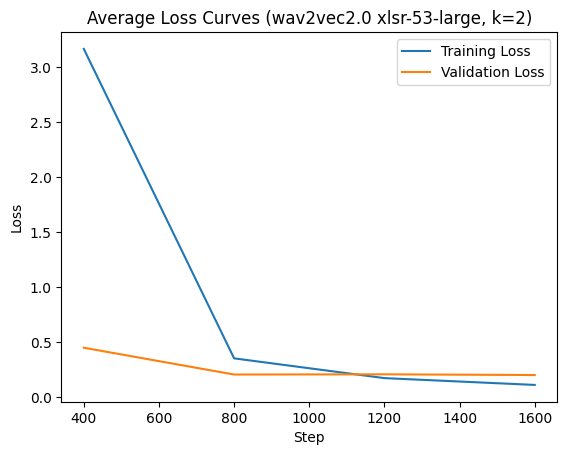

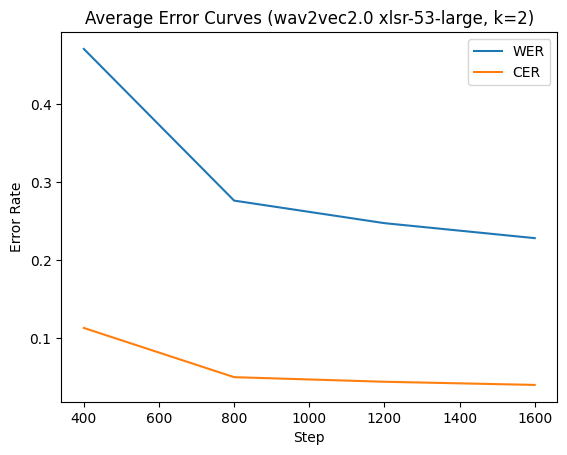

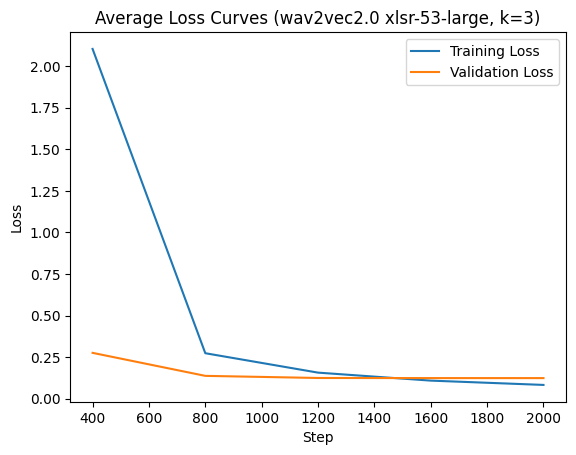

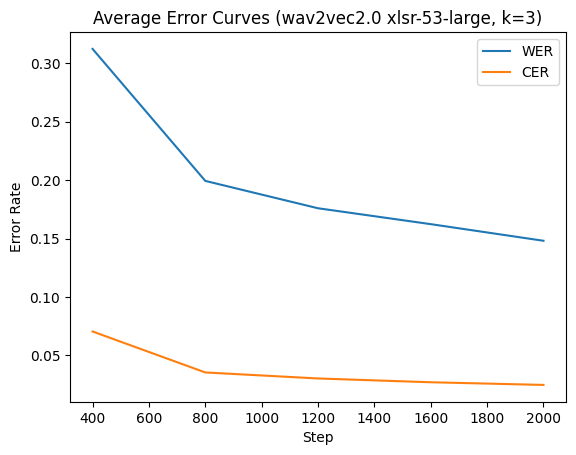

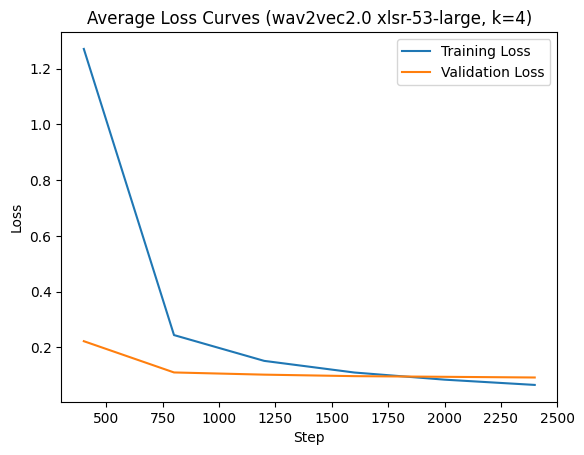

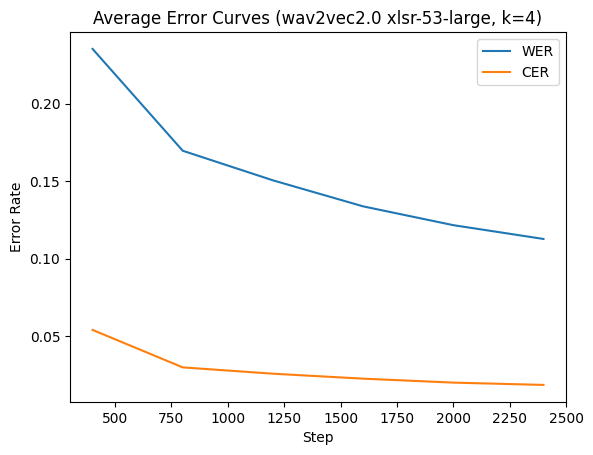

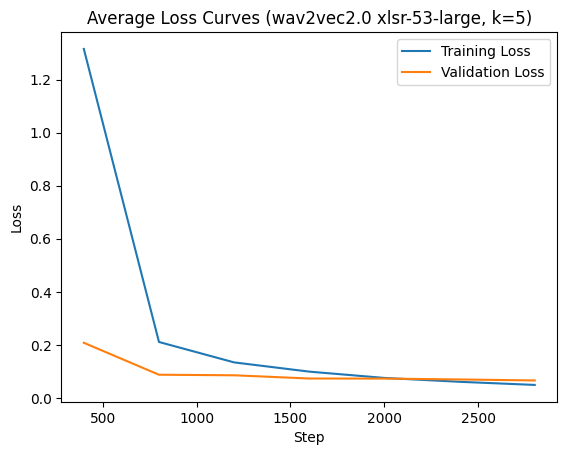

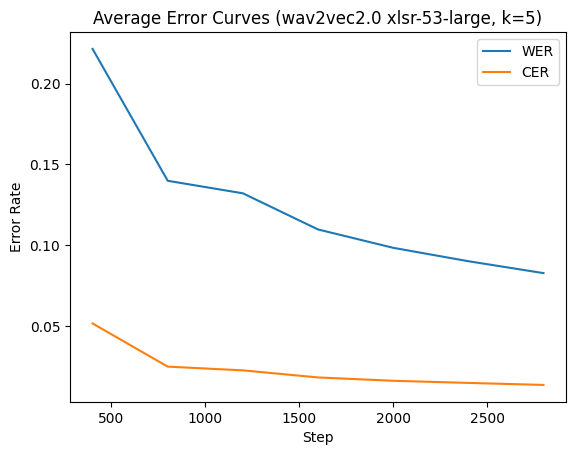

In [7]:
# Generate updated plots with model name in titles
for k, info in data.items():
    steps = info['steps']
    folds = info['folds']
    train_avg = np.mean([fold['train_loss'] for fold in folds], axis=0)
    val_avg = np.mean([fold['val_loss'] for fold in folds], axis=0)
    wer_avg = np.mean([fold['wer'] for fold in folds], axis=0)
    cer_avg = np.mean([fold['cer'] for fold in folds], axis=0)

    # Plot Loss Curves
    plt.figure()
    plt.plot(steps, train_avg, label='Training Loss')
    plt.plot(steps, val_avg, label='Validation Loss')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title(f'Average Loss Curves (wav2vec2.0 xlsr-53-large, k={k})')
    plt.legend()
    plt.show()

    # Plot Error Curves
    plt.figure()
    plt.plot(steps, wer_avg, label='WER')
    plt.plot(steps, cer_avg, label='CER')
    plt.xlabel('Step')
    plt.ylabel('Error Rate')
    plt.title(f'Average Error Curves (wav2vec2.0 xlsr-53-large, k={k})')
    plt.legend()
    plt.show()


In [8]:
whisper_data = {
    2: {
        'steps': [400, 800],
        'folds': [
            {'train_loss': [0.5327, 0.0326],
             'val_loss':   [0.15472, 0.163913],
             'wer':        [0.469445, 0.395375],
             'cer':        [0.097788, 0.077487]},
            {'train_loss': [0.0842, 0.0133],
             'val_loss':   [0.015552, 0.015381],
             'wer':        [0.067661, 0.075228],
             'cer':        [0.011524, 0.012427]}
        ]
    },
    3: {
        'steps': [400, 800, 1200],
        'folds': [
            {'train_loss': [0.5378, 0.0474, 0.0068],
             'val_loss':   [0.142162, 0.141716, 0.160802],
             'wer':        [0.463028, 0.376064, 0.351527],
             'cer':        [0.096547, 0.074515, 0.068077]},
            {'train_loss': [0.0477, 0.0143, 0.0021],
             'val_loss':   [0.018585, 0.022235, 0.017627],
             'wer':        [0.093734, 0.096758, 0.07492],
             'cer':        [0.014716, 0.015599, 0.012093]},
            {'train_loss': [0.0070, 0.0066, 0.0013],
             'val_loss':   [0.003747, 0.004799, 0.002425],
             'wer':        [0.019356, 0.023694, 0.014183],
             'cer':        [0.003142, 0.00388, 0.002071]}
        ]
    },
    4: {
        'steps': [400, 800, 1200, 1600],
        'folds': [
            {'train_loss': [0.536, 0.0557, 0.0098, 0.0011],
             'val_loss':   [0.140445, 0.125187, 0.143755, 0.151775],
             'wer':        [0.452323, 0.374305, 0.350967, 0.328295],
             'cer':        [0.092056, 0.074552, 0.065166, 0.062121]},
            {'train_loss': [0.0319, 0.0106, 0.0026, 0.0003],
             'val_loss':   [0.007049, 0.009895, 0.006829, 0.005923],
             'wer':        [0.032294, 0.063019, 0.043283, 0.03521],
             'cer':        [0.005796, 0.010984, 0.006661, 0.005668]},
            {'train_loss': [0.0034, 0.0072, 0.0015, 0.0001],
             'val_loss':   [0.012776, 0.005324, 0.003609, 0.002999],
             'wer':        [0.090343, 0.03004, 0.020249, 0.013129],
             'cer':        [0.009887, 0.004738, 0.003032, 0.002085]},
            {'train_loss': [0.0029, 0.006, 0.0013, 0.0001],
             'val_loss':   [0.005736, 0.004112, 0.002291, 0.001765],
             'wer':        [0.026756, 0.022074, 0.008473, 0.006912],
             'cer':        [0.004578, 0.003751, 0.001685, 0.001208]}
        ]
    },
    5: {
        'steps': [400, 800, 1200, 1600],
        'folds': [
            {'train_loss': [0.5415, 0.0583, 0.0124, 0.0016],
             'val_loss':   [0.13612, 0.123327, 0.134373, 0.146481],
             'wer':        [0.436182, 0.374029, 0.339068, 0.326304],
             'cer':        [0.089227, 0.073476, 0.065562, 0.060876]},
            {'train_loss': [0.0249, 0.0105, 0.0027, 0.0007],
             'val_loss':   [0.008294, 0.009221, 0.006653, 0.004493],
             'wer':        [0.035694, 0.05159, 0.032627, 0.022588],
             'cer':        [0.006044, 0.007818, 0.004433, 0.003345]},
            {'train_loss': [0.0032, 0.0065, 0.0027, 0.0003],
             'val_loss':   [0.008309, 0.005331, 0.003317, 0.002253],
             'wer':        [0.038472, 0.030329, 0.017692, 0.012918],
             'cer':        [0.006539, 0.004438, 0.002893, 0.002338]},
            {'train_loss': [0.0023, 0.0063, 0.0013, 0.0001],
             'val_loss':   [0.007152, 0.006153, 0.002616, 0.002003],
             'wer':        [0.040879, 0.033092, 0.010567, 0.008343],
             'cer':        [0.006394, 0.005242, 0.001668, 0.001112]},
            {'train_loss': [0.0022, 0.0055, 0.0013, 0.0001],
             'val_loss':   [0.004177, 0.002992, 0.002525, 0.002187],
             'wer':        [0.017827, 0.014206, 0.010306, 0.008635],
             'cer':        [0.00297, 0.002218, 0.002099, 0.001743]}
        ]
    }
}

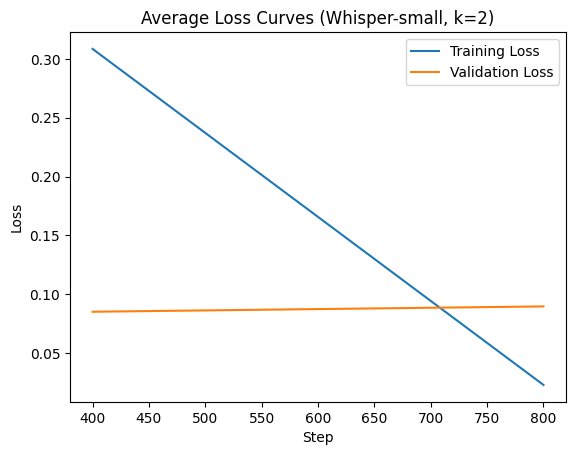

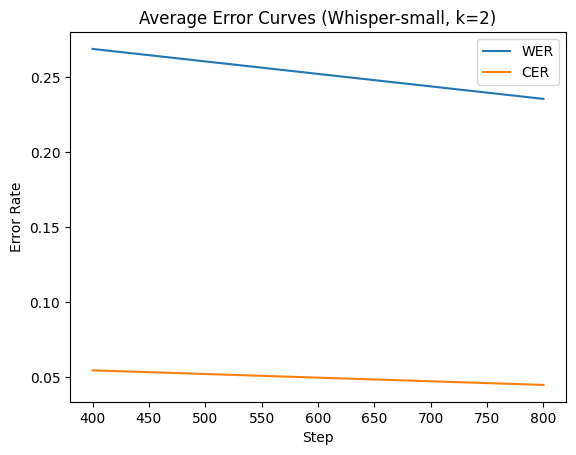

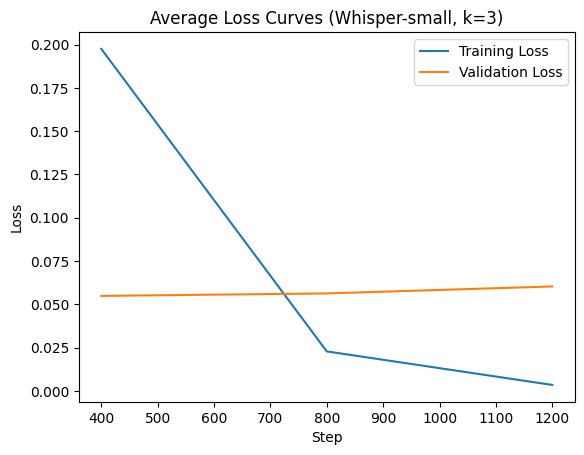

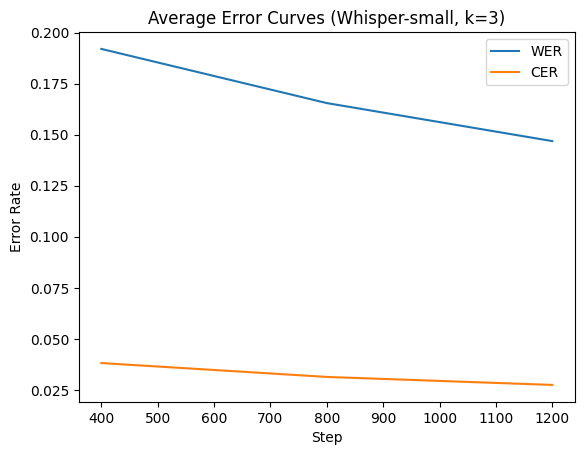

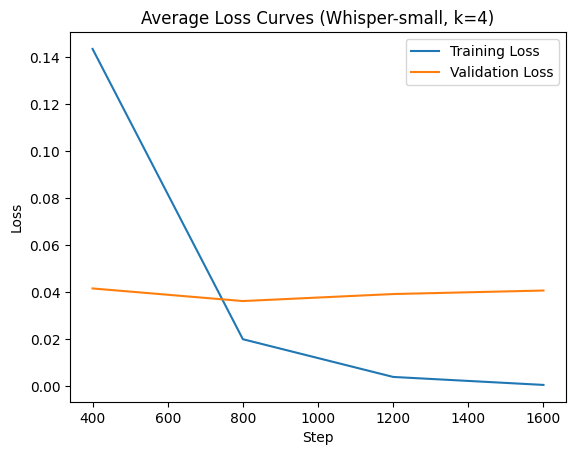

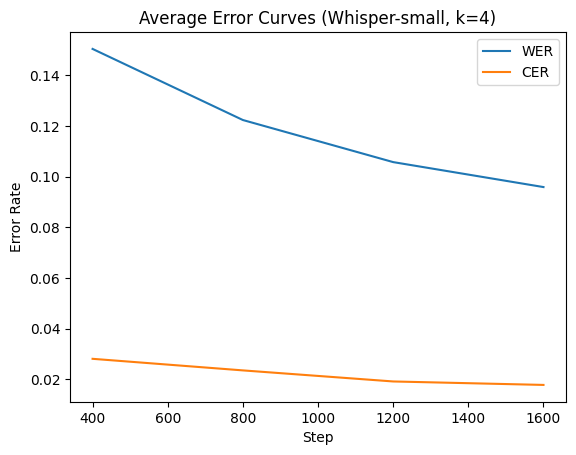

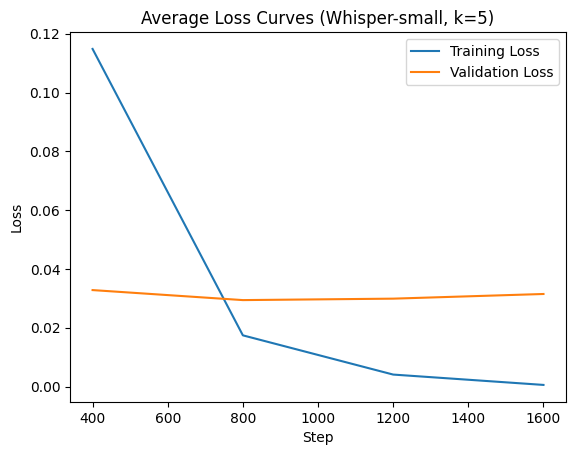

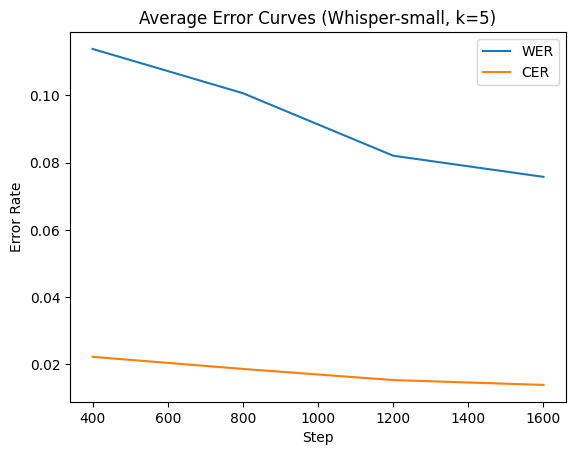

In [9]:

for k, info in whisper_data.items():
    steps = info['steps']
    folds = info['folds']
    train_avg = np.mean([f['train_loss'] for f in folds], axis=0)
    val_avg = np.mean([f['val_loss'] for f in folds], axis=0)
    wer_avg = np.mean([f['wer'] for f in folds], axis=0)
    cer_avg = np.mean([f['cer'] for f in folds], axis=0)
    
    plt.figure()
    plt.plot(steps, train_avg, label='Training Loss')
    plt.plot(steps, val_avg, label='Validation Loss')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title(f'Average Loss Curves (Whisper-small, k={k})')
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.plot(steps, wer_avg, label='WER')
    plt.plot(steps, cer_avg, label='CER')
    plt.xlabel('Step')
    plt.ylabel('Error Rate')
    plt.title(f'Average Error Curves (Whisper-small, k={k})')
    plt.legend()
    plt.show()
